Text(0.0, 1.0, 'Axes')

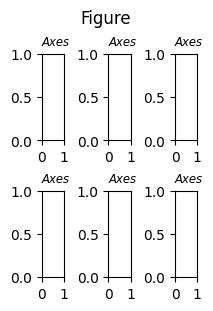

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(2, 3), facecolor='white',
                 layout='constrained')
fig.suptitle('Figure')
ax1=fig.add_subplot(2,3,1)
ax1.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
ax2=fig.add_subplot(2,3,2)
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
ax2=fig.add_subplot(2,3,3)
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
ax2=fig.add_subplot(2,3,4)
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
ax2=fig.add_subplot(2,3,5)
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
ax2=fig.add_subplot(2,3,6)
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')

Text(0.0, 1.0, 'Axes')

<Figure size 200x200 with 0 Axes>

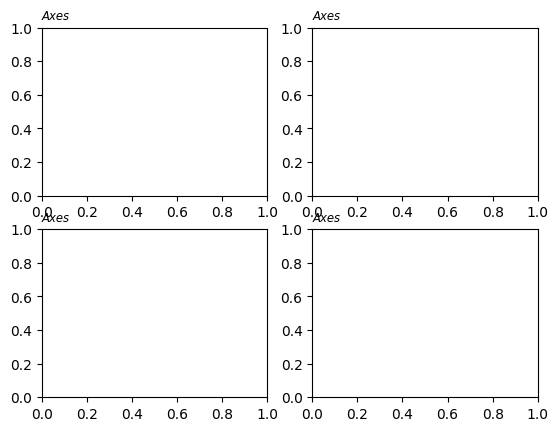

In [4]:
fig = plt.figure(figsize=(2, 2), facecolor='white',
                 layout='constrained')
fig.suptitle('Figure')
#fg,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
fg,axs=plt.subplots(2,2)
axs[0][0].set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
axs[0][1].set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
axs[1][0].set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')
axs[1][1].set_title('Axes', loc='left', fontstyle='oblique', fontsize='small')

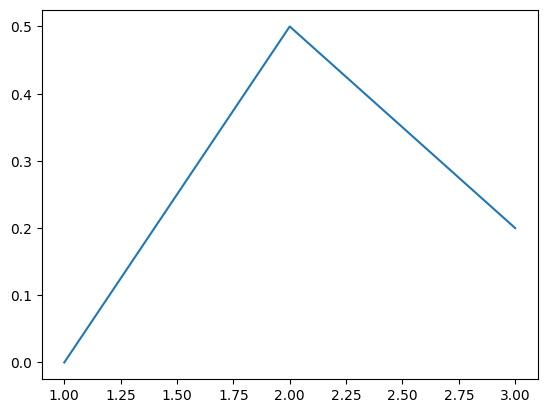

In [5]:
plt.subplots()
plt.plot([1, 2, 3], [0, 0.5, 0.2])

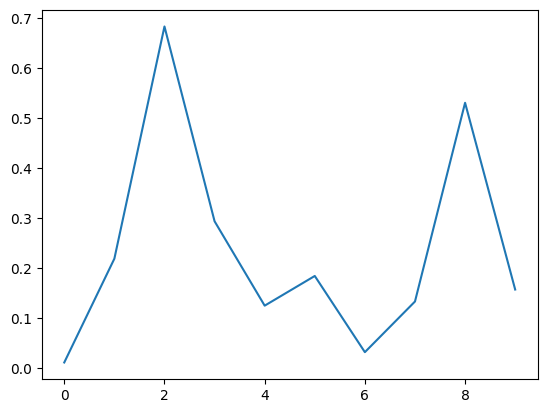

In [6]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata)) 

cid = fig.canvas.mpl_connect('button_press_event', onclick)

Text(0.5, 0.98, 'plt.subplot_mosaic()')

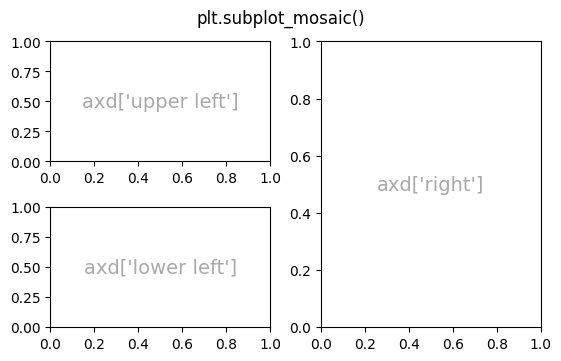

In [7]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

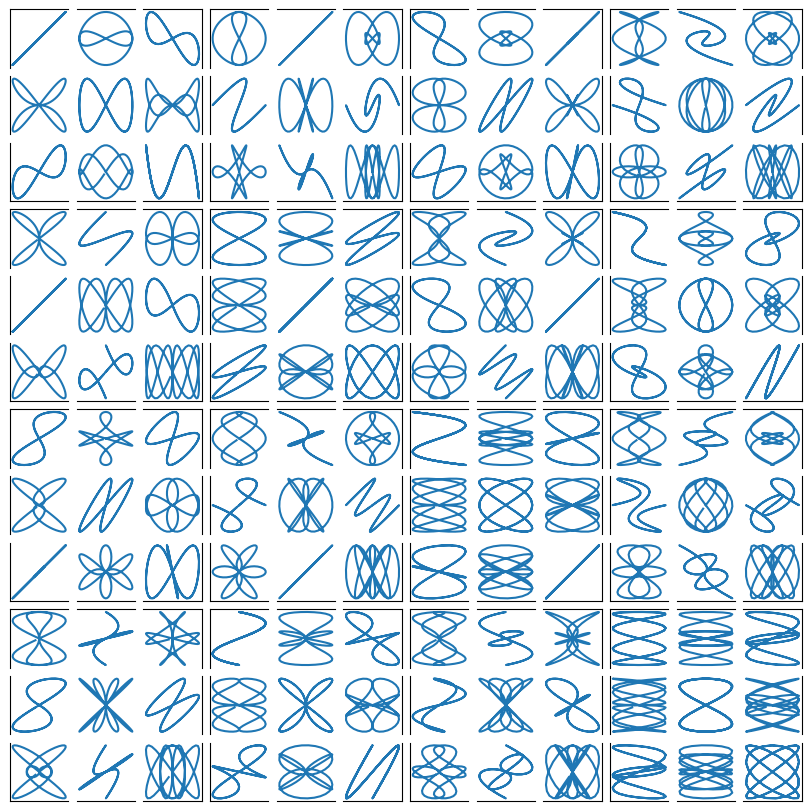

In [8]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8), layout='constrained')
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())


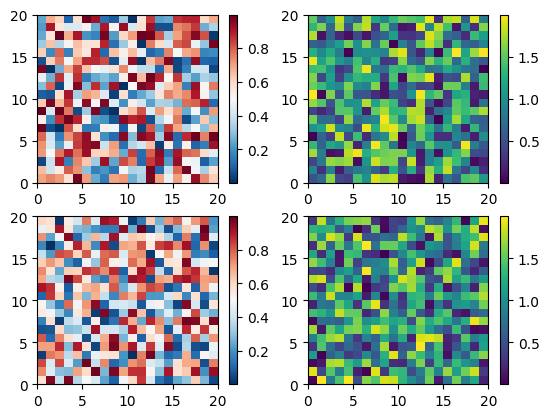

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

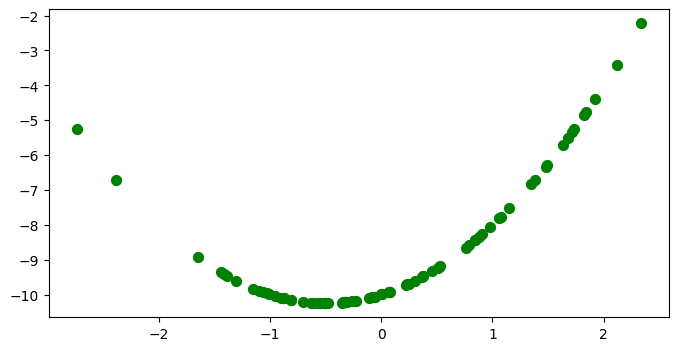

In [10]:
x1=np.random.randn(80)
x2=x1+x1**2-10
plt.figure(figsize=(8,4))
plt.scatter(x1,x2,s=50,c="g",label="Positive")

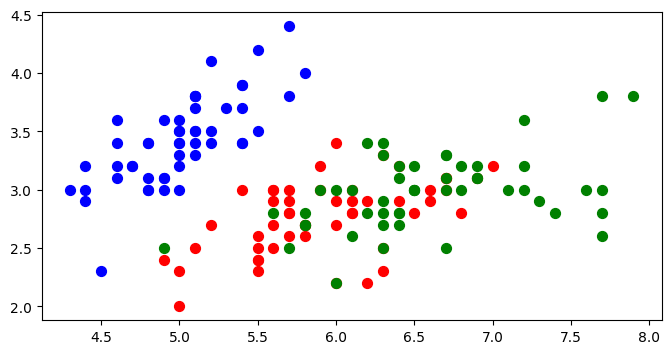

In [12]:
from sklearn.datasets import load_iris
iris=load_iris()
x_index=0
y_index=1
colors=['blue','red','green']
plt.figure(figsize=(8,4))
for label,color in zip(range(len(iris.target_names)),colors): 
    plt.scatter(iris.data[iris.target==label,x_index],
            iris.data[iris.target==label,y_index] #横纵坐标
            ,s=50,c=color,label=iris.target_names[label])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


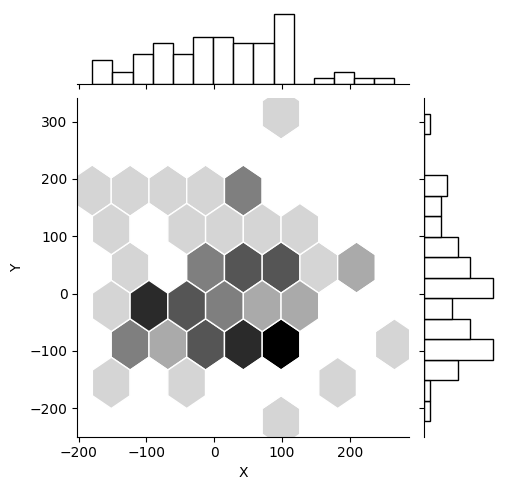

In [7]:
import numpy as np
import pandas as pd
def plot_joingrid(x, y):
    '''
    绘制两个变量关系图
    INPUT  -> 字段1, 字段2
    '''

    sns.jointplot(x=x, y=y, # 设置xy轴，显示columns名称
              color = 'white',   # 设置颜色
              # s = 50, 
              edgecolor="w",linewidth=1,  # 设置散点大小、边缘线颜色及宽度(只针对scatter）
              kind = 'hex',   # 设置类型：“scatter”、“reg”、“resid”、“kde”、“hex”
             space = 0.2,  # 设置散点图和布局图的间距
              height = 5,   # 图表大小（自动调整为正方形）}
              ratio = 4,  # 散点图与布局图高度比，整型
              marginal_kws=dict(bins=15, rug=True)  # 设置柱状图箱数，是否设置rug
              ).set_axis_labels("X","Y")

    
rs = np.random.RandomState(80)
s = pd.Series(rs.randn(70) * 100)
h = pd.Series(rs.randn(70) * 100)
plot_joingrid(s, h)

In [8]:
def plot_pairgrid1(x, y):
    '''
    绘制分类散点图
    INPUT  -> 分组列, 统计列
    '''
    colors = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
    sns.stripplot(x=x,   # 设置分组统计字段
                  y=y,   # 数据分布统计字段    
                  # 这里xy数据对调，会使得散点图横向分布
                  jitter=0.05,  # jitter代表设置抖动
                  edgecolor = 'w', linewidth = 1, marker = 'o',
                  palette=colors)  

def plot_pairgrid2(x, y):
    '''
    绘制分簇散点图
    INPUT  -> 分组列, 统计列
    '''
    colors = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
    sns.swarmplot(x=x,   # 设置分组统计字段
                  y=y,   # 数据分布统计字段    
                  # 这里xy数据对调，会使得散点图横向分布
                  edgecolor = 'w', linewidth = 1, marker = 'o',
                  palette=colors)  

In [9]:
tips = sns.load_dataset('tips')
tips.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

C:\Users\Cindy_Sun\AppData\Local\Temp\ipykernel_32808\1127360584.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=x,   # 设置分组统计字段
C:\Users\Cindy_Sun\AppData\Local\Temp\ipykernel_32808\1127360584.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.stripplot(x=x,   # 设置分组统计字段
C:\Users\Cindy_Sun\AppData\Local\Temp\ipykernel_32808\1127360584.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=x,   # 设置分组统计字段
C:\Users\Cindy_Sun\AppData\Local\Temp\ipykernel_32808\1127360584.py:20: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.swarmplot(x=x,   # 设置分组统计字段


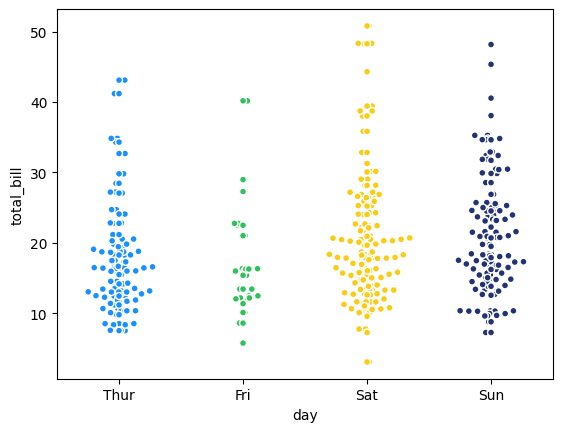

In [10]:
plot_pairgrid1(tips['day'], tips['total_bill'])
plot_pairgrid2(tips['day'], tips['total_bill'])

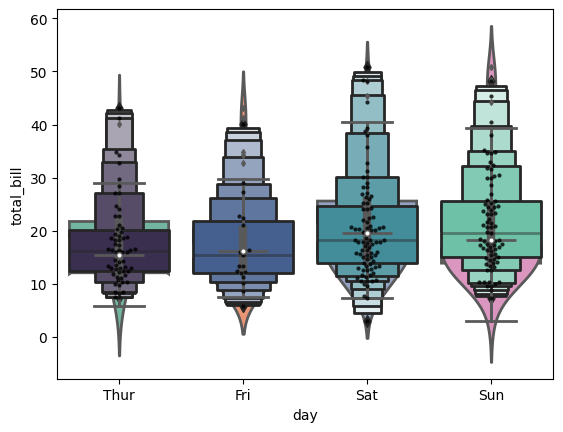

In [25]:
def plot_box(x, y):
    '''
    绘制箱体图
    INPUT  -> 字段1, 字段2
    '''
    sns.boxplot(x = x, y = y, 
                # data = df,
                linewidth = 2, #线宽
                width = 0.8, # 箱之间的间隔比例
                fliersize = 3, #异常点大小
                whis = 1.5,     #设置IQR
                notch = True,   #设置是否以中值做凹槽
                order = {'Thur','Fri','Sat','Sun'}, # 筛选类别
                palette='Set2'  #设置调色板
                )
    #可以添加散点图
    sns.swarmplot(x = x, y = y, color = 'k', size = 3, alpha = 0.8)

def plot_violin(x, y):
    '''
    绘制小提琴图
    INPUT  -> 字段1, 字段2
    '''
    sns.violinplot(x = x, y = y, 
                # data = df,
                linewidth = 2, # 线宽
                width = 0.8, # 箱之间的间隔比例
                fliersize = 3, # 异常点大小
                whis = 1.5,     # 设置IQR
                notch = True,   # 设置是否以中值做凹槽
                scale = 'count',  # 测度小提琴图的宽度: area-面积相同,count-按照样本数量决定宽度,width-宽度一样
                order = {'Thur','Fri','Sat','Sun'}, # 筛选类别
                palette='Set2',  #设置调色板
                # hue = z,   # 按z再细分
                # split = True, # 设置是否按z拆分小提琴图
                )

def plot_lv(x, y):
    '''
    绘制LV图(信值图)
    INPUT  -> 字段1, 字段2
    '''
    sns.boxenplot(x = x, y = y, 
                # data = df,
                palette = 'mako',
                linewidth = 2, # 线宽
                width = 0.8, # 箱之间的间隔比例
                scale = 'area', # 设置框的大小:'linear'、'exonential'、'area'
                k_depth = 'proportion' # 设置框的数量:'proportion','tukey','trustworthy'
                )

tips = sns.load_dataset('tips')
plot_box(tips['day'], tips['total_bill'])
plot_violin(tips['day'], tips['total_bill'])
plot_lv(tips['day'], tips['total_bill'])

In [ ]:
from sklearn.datasets import load_wine

wine=load_wine()
wine_df=pd.DataFrame(wine.data)

def plot_pairgrid(df, mark=None):
    '''
    绘制矩阵图
    INPUT  -> 数据集, 分类标签
    '''
    g = sns.PairGrid(data=df, 
                     hue=mark)  
                     # vars=["sepal_width", "sepal_length"]  vars:需要组合的数据字段 
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)   # 单变量
    # g = g.map_offdiag(plt.scatter)   
    g = g.map_upper(plt.scatter) 
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45)
    plt.show()

plot_pairgrid(wine_df)